In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
data=pd.read_csv('Admission.csv')
data

,GPA,GMAT,Decision
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit
...,...,...,...
80,3.05,399,border
81,2.85,483,border
82,3.01,453,border
83,3.03,414,border


In [3]:
data['Decision'].unique()

array(['admit', 'notadmit', 'border'], dtype=object)

<AxesSubplot:>

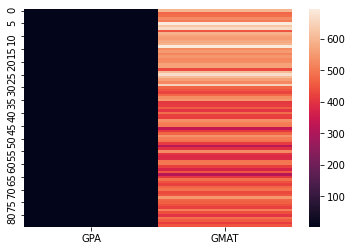

In [4]:
sns.heatmap(data[['GPA','GMAT']])

In [5]:
data["Decision"].replace({'admit':1, 'notadmit':0,'border':2}, inplace=True)

In [6]:
data["Decision"]

0     1
1     1
2     1
3     1
4     1
     ..
80    2
81    2
82    2
83    2
84    2
Name: Decision, Length: 85, dtype: int64

In [7]:
data.shape

(85, 3)

c:\users\aurnob\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Decision', ylabel='count'>

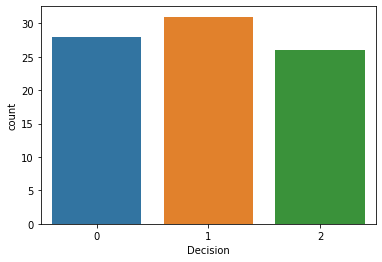

In [8]:
sns.countplot(data["Decision"])

In [9]:
data.isnull().sum()

GPA         0
GMAT        0
Decision    0
dtype: int64

In [10]:
x=data.drop('Decision',axis=1)
y=data['Decision']

In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [14]:
x_train.shape

(63, 2)

In [15]:
from sklearn.ensemble import RandomForestClassifier


In [16]:
rn=RandomForestClassifier(n_estimators=5,criterion='entropy')

In [17]:
rn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [18]:
y_pred=rn.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [20]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[5 0 0]
 [0 7 1]
 [0 1 8]]
0.9090909090909091


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=lg.predict(x_test)

In [24]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[5 0 0]
 [0 8 0]
 [1 0 8]]
0.9545454545454546
